In [9]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [15]:
from skimage import data
import imageio

photo_data = imageio.imread(r"C:\Users\asbur\OneDrive\Desktop\MtFuji-GettyImages.jpg")
type(photo_data)

imageio.core.util.Array

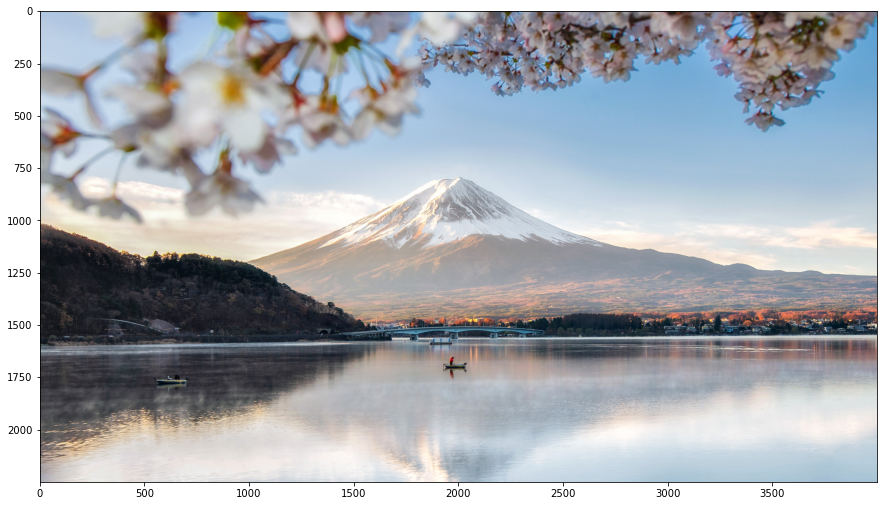

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [17]:
photo_data.shape

#print(photo_data)

(2249, 3999, 3)

In [18]:
photo_data.size

26981253

In [19]:
photo_data.min(), photo_data.max()

(0, 255)

In [20]:
photo_data.mean()

163.6031657610564

In [22]:
photo_data = imageio.imread(r"C:\Users\asbur\OneDrive\Desktop\MtFuji-GettyImages.jpg")
print("Shape of photo_data:", photo_data.shape)
low_value_filter = photo_data < 150
print("Shape of low_value_filter:", low_value_filter.shape)

Shape of photo_data: (2249, 3999, 3)
Shape of low_value_filter: (2249, 3999, 3)


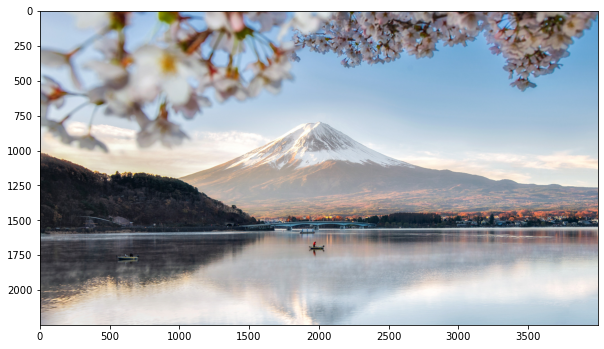

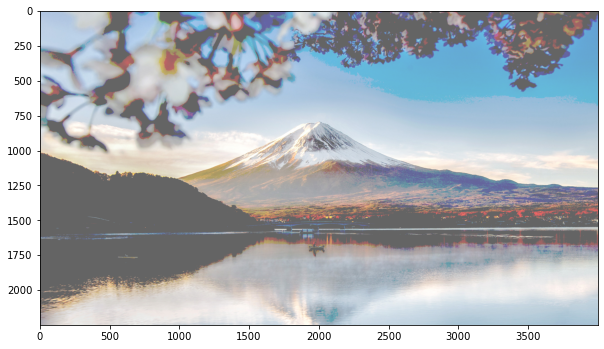

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 100
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

In [24]:
rows_range = np.arange(len(photo_data))
cols_range = rows_range
print(type(rows_range))

<class 'numpy.ndarray'>


In [25]:
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data = ", photo_data.shape)

X, Y =np.ogrid[:total_rows, :total_cols]
print("X = ", X.shape, " and Y = ", Y.shape)

photo_data =  (2249, 3999, 3)
X =  (2249, 1)  and Y =  (1, 3999)


In [26]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center_row = ", center_row, "AND center_col = ", center_col)
print(X - center_row)
print(Y - center_col)
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
print(dist_from_center)
radius = (total_rows / 2)**2
print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
print(circular_mask)
print(circular_mask[1500:1700,2000:2200])

center_row =  1124.5 AND center_col =  1999.5
[[-1124.5]
 [-1123.5]
 [-1122.5]
 ...
 [ 1121.5]
 [ 1122.5]
 [ 1123.5]]
[[-1999.5 -1998.5 -1997.5 ...  1996.5  1997.5  1998.5]]
[[5262500.5 5258502.5 5254506.5 ... 5250512.5 5254506.5 5258502.5]
 [5260252.5 5256254.5 5252258.5 ... 5248264.5 5252258.5 5256254.5]
 [5258006.5 5254008.5 5250012.5 ... 5246018.5 5250012.5 5254008.5]
 ...
 [5255762.5 5251764.5 5247768.5 ... 5243774.5 5247768.5 5251764.5]
 [5258006.5 5254008.5 5250012.5 ... 5246018.5 5250012.5 5254008.5]
 [5260252.5 5256254.5 5252258.5 ... 5248264.5 5252258.5 5256254.5]]
Radius =  1264500.25
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...

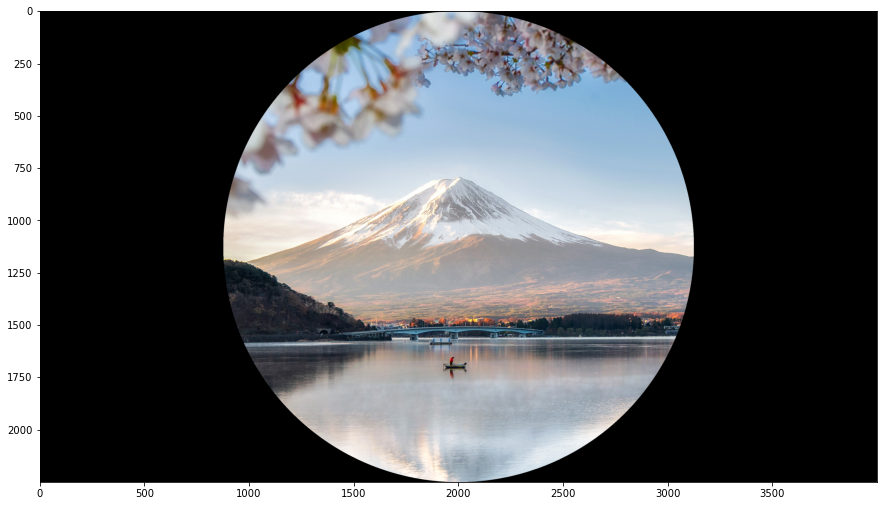

In [28]:
photo_data = imageio.imread(r"C:\Users\asbur\OneDrive\Desktop\MtFuji-GettyImages.jpg")
photo_data[circular_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [30]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above

half_upper_mask = np.logical_and(half_upper, circular_mask)

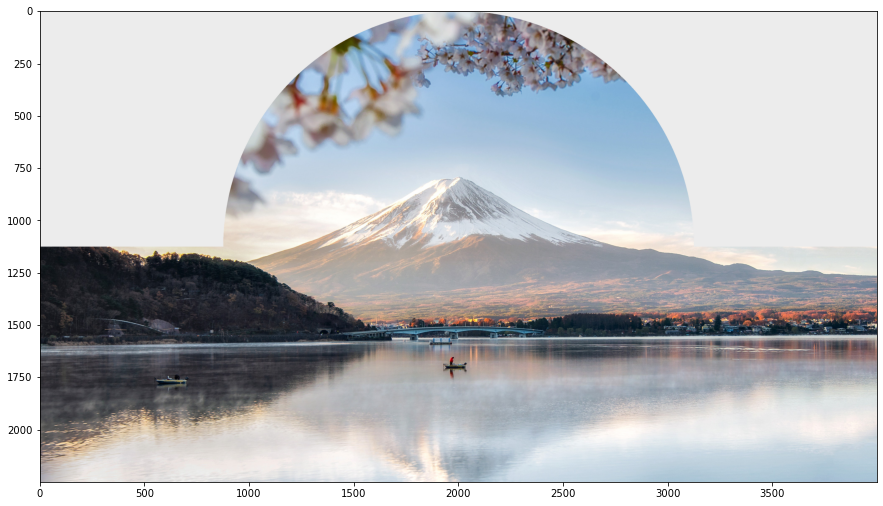

In [32]:
import random
photo_data = imageio.imread(r"C:\Users\asbur\OneDrive\Desktop\MtFuji-GettyImages.jpg")
photo_data[half_upper_mask] = 255
photo_data[half_upper_mask] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

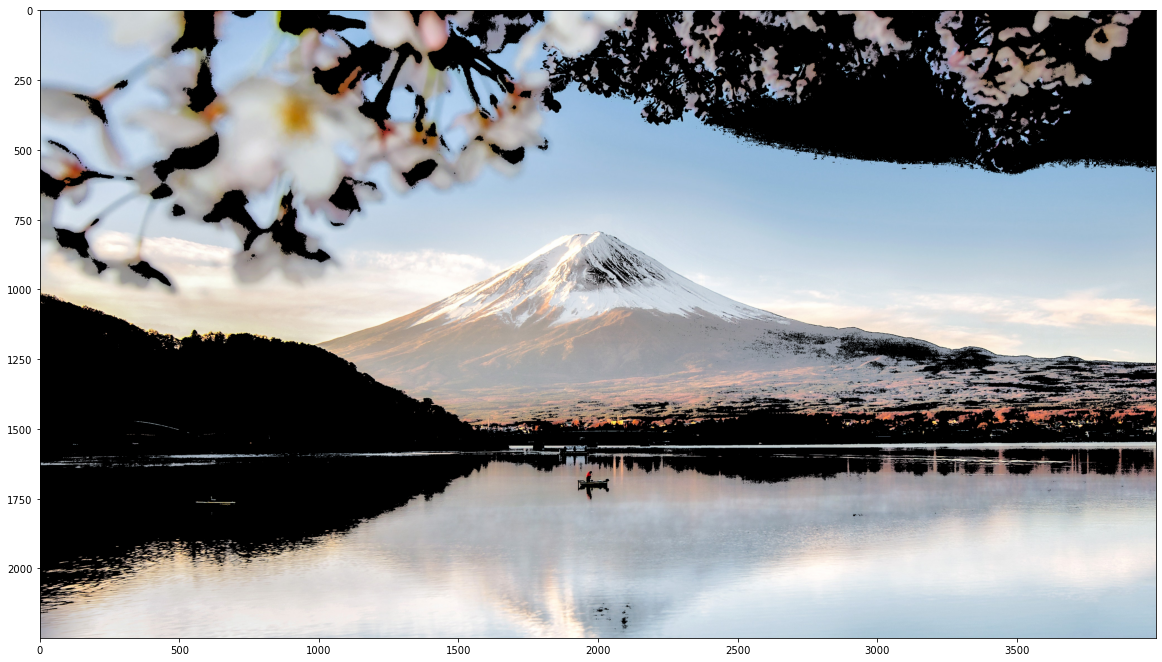

In [33]:
photo_data = imageio.imread(r"C:\Users\asbur\OneDrive\Desktop\MtFuji-GettyImages.jpg")
red_mask = photo_data[:, :, 0] < 140

photo_data[red_mask] = 0
plt.figure(figsize=(20,20))
plt.imshow(photo_data)

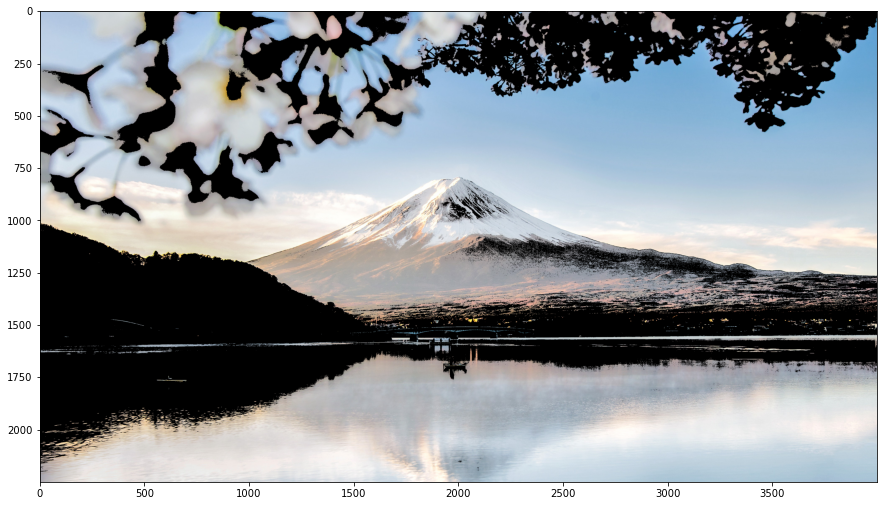

In [34]:
photo_data = imageio.imread(r"C:\Users\asbur\OneDrive\Desktop\MtFuji-GettyImages.jpg")
green_mask = photo_data[:, :, 1] < 150

photo_data[green_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

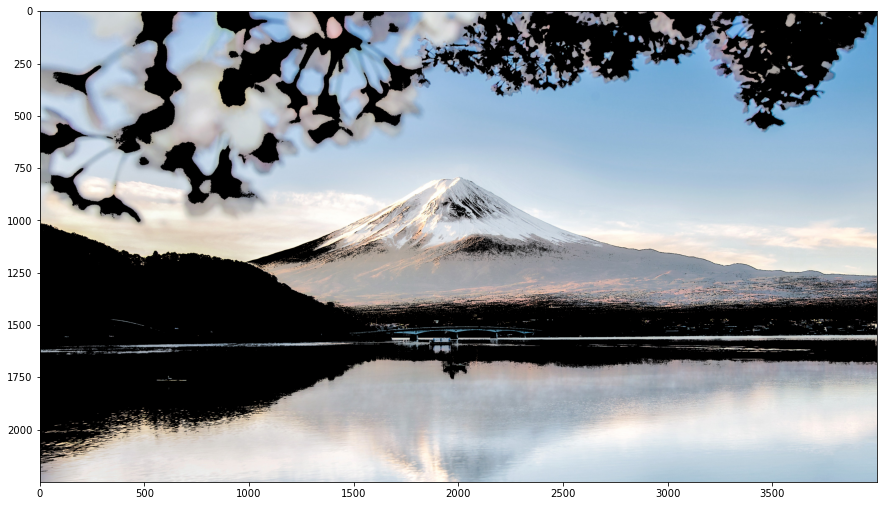

In [35]:
photo_data = imageio.imread(r"C:\Users\asbur\OneDrive\Desktop\MtFuji-GettyImages.jpg")
blue_mask = photo_data[:, :, 2] < 150

photo_data[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

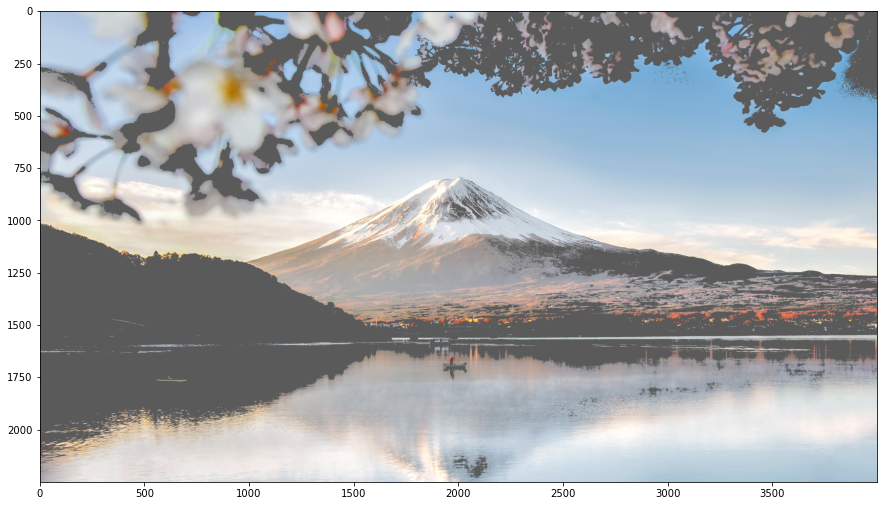

In [37]:
photo_data = imageio.imread(r"C:\Users\asbur\OneDrive\Desktop\MtFuji-GettyImages.jpg")

red_mask = photo_data[:, : ,0] < 150
green_mask = photo_data[:, : ,1] < 170
blue_mask = photo_data[:, : ,2] < 200

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
photo_data[final_mask] = 90
plt.figure(figsize=(15,15))
plt.imshow(photo_data)